<a href="https://colab.research.google.com/github/TaciturnCoder/EMD/blob/main/EMD_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[//]: # ( ------------------------------------------------------------------ {c)
[//]: # ( COPYRIGHT 2022 Dwij Bavisi <dwijbavisi@gmail.com>                  {c)
[//]: # ( Licensed under:                                                    {c)
[//]: # (     Taciturn Coder's `License to Hack` License                     {c)
[//]: # (     TC's L2H 1.0                                                   {c)
[//]: # ( A copy of the License may be obtained from:                        {c)
[//]: # (     https://TaciturnCoder.github.io/TCsL2H/legalcode/1.0           {c)
[//]: # ( See the License for the permissions and limitations.               {c)
[//]: # ( ------------------------------------------------------------------ {c)

COPYRIGHT 2022 Dwij Bavisi <<dwijbavisi@gmail.com>>

Licensed under:

    Taciturn Coder's `License to Hack` License
    TC's L2H 1.0

A copy of the License may be obtained from:

    https://TaciturnCoder.github.io/TCsL2H/legalcode/1.0

See the License for the permissions and limitations.

# Empirical Mode Decomposition (EMD)
Step by step introduction to basics of EMD Process

In [1]:
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 100

from scipy.interpolate import CubicSpline

from fractions import Fraction

## Intrinsic Mode Function (IMF)
An IMF has zero mean. \\
A sin wave is an example of IMF


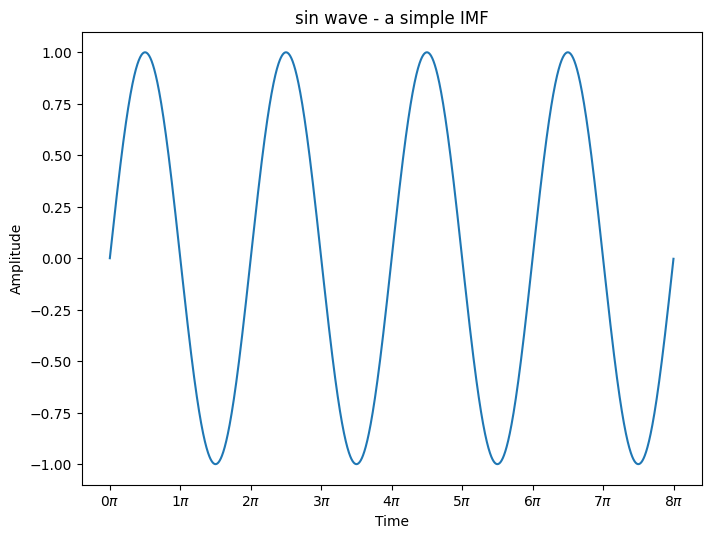

In [2]:
frequency = 1
resolution = 0.01
cycles = 4

time = np.arange(0, 2 * cycles * np.pi, resolution)
amplitude = np.sin(frequency * time)

x_ticks = np.arange(0, 2 * cycles)
x_ticks = np.append(x_ticks, 2 * cycles)
x_tick_labels = [f"{Fraction(x)}$\pi$" for x in x_ticks]

plt.title("sin wave - a simple IMF")
plt.plot(time, amplitude)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xticks(x_ticks * np.pi, x_tick_labels);

## Sample composite signal

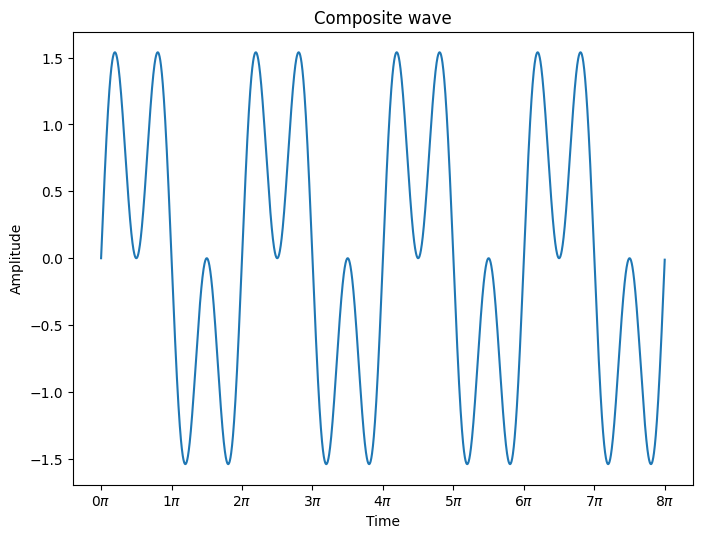

In [3]:
frequency_1 = 1
frequency_2 = 3

resolution = 0.01
cycles = 4
time = np.arange(0, 2 * cycles * np.pi, resolution)

amplitude_1 = np.sin(frequency_1 * time)
amplitude_2 = np.sin(frequency_2 * time)
amplitude_composite = amplitude_1 + amplitude_2

x_ticks = np.arange(0, 2 * cycles)
x_ticks = np.append(x_ticks, 2 * cycles)
x_tick_labels = [f"{Fraction(x)}$\pi$" for x in x_ticks]

plt.plot(time, amplitude_composite)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xticks(x_ticks * np.pi, x_tick_labels)
plt.title("Composite wave")
plt.show()
plt.close()

## Determine extrema

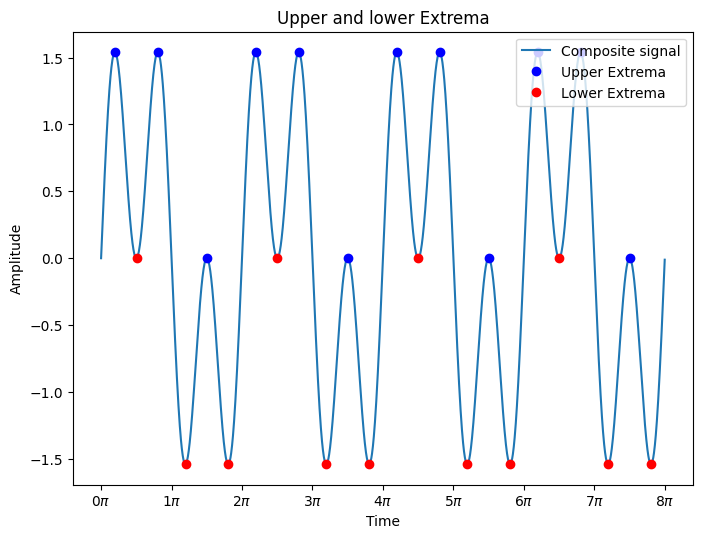

In [4]:
nodata_flag = np.nan
upper = np.zeros(len(amplitude_composite))
lower = np.zeros(len(amplitude_composite))
upper[:] = nodata_flag
lower[:] = nodata_flag

graph_stat_history = 'up'
graph_stat_recent = 'up'
for i in range(len(amplitude_composite)):
    if i == 1:
        if amplitude_composite[i] > amplitude_composite[i-1]:
            graph_stat_recent = 'up'
            graph_stat_history = 'up'
        elif amplitude_composite[i] < amplitude_composite[i-1]:
            graph_stat_recent = 'down'
            graph_stat_history = 'down'
        else:
            graph_stat_recent = graph_stat_history
            continue
    if amplitude_composite[i] > amplitude_composite[i-1]:
        graph_stat_recent = 'up'
    elif amplitude_composite[i] < amplitude_composite[i-1]:
        graph_stat_recent = 'down'
    else:
        graph_stat_recent = graph_stat_history
	
    if graph_stat_recent != graph_stat_history:
        if graph_stat_recent == 'up':
            lower[i] = amplitude_composite[i-1]
            graph_stat_history = 'up'
        elif graph_stat_recent == 'down':
            upper[i] = amplitude_composite[i-1]
            graph_stat_history = 'down'


x_ticks = np.arange(0, 2 * cycles)
x_ticks = np.append(x_ticks, 2 * cycles)
x_tick_labels = [f"{Fraction(x)}$\pi$" for x in x_ticks]

plt.plot(time, amplitude_composite, label = "Composite signal")
plt.plot(time, upper, "bo", label = "Upper Extrema")
plt.plot(time, lower, "ro", label = "Lower Extrema")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xticks(x_ticks * np.pi, x_tick_labels)
plt.title("Upper and lower Extrema")
plt.legend(loc = 0)
plt.show()
plt.close()

## Determine Evelope

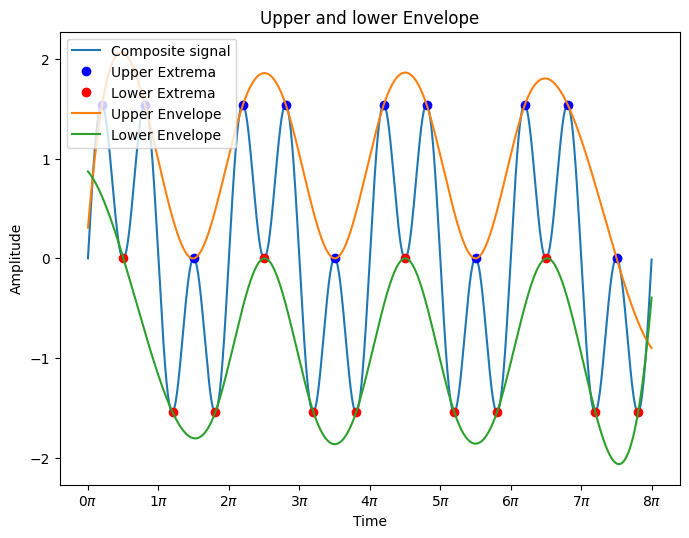

In [5]:
all_minima_point = []
all_minima_point_time = []
all_maxima_point = []
all_maxima_point_time = []
for i in range(len(lower)):
    if not np.isnan(lower[i]):
        all_minima_point.append(lower[i])
        all_minima_point_time.append(time[i])

for i in range(len(upper)):
    if not np.isnan(upper[i]):
        all_maxima_point.append(upper[i])
        all_maxima_point_time.append(time[i])

all_minima_point = np.asarray(all_minima_point)
all_minima_point_time = np.asarray(all_minima_point_time)
all_maxima_point = np.asarray(all_maxima_point)
all_maxima_point_time = np.asarray(all_maxima_point_time)

#print(all_maxima_point, all_minima_point)
cs_minima = CubicSpline(all_minima_point_time, all_minima_point)
cs_maxima = CubicSpline(all_maxima_point_time, all_maxima_point)
#print(cs_minima, cs_maxima)
lower_env = cs_minima(time)
upper_env = cs_maxima(time)
#print(lower_env)

plt.plot(time, amplitude_composite, label = "Composite signal")
plt.plot(time, upper, "bo", label = "Upper Extrema")
plt.plot(time, lower, "ro", label = "Lower Extrema")
plt.plot(time, upper_env, label = "Upper Envelope")
plt.plot(time, lower_env, label = "Lower Envelope")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xticks(x_ticks * np.pi, x_tick_labels)
plt.title("Upper and lower Envelope")
plt.legend(loc = 0)
plt.show()
plt.close()

## Determin Mean of envelopes

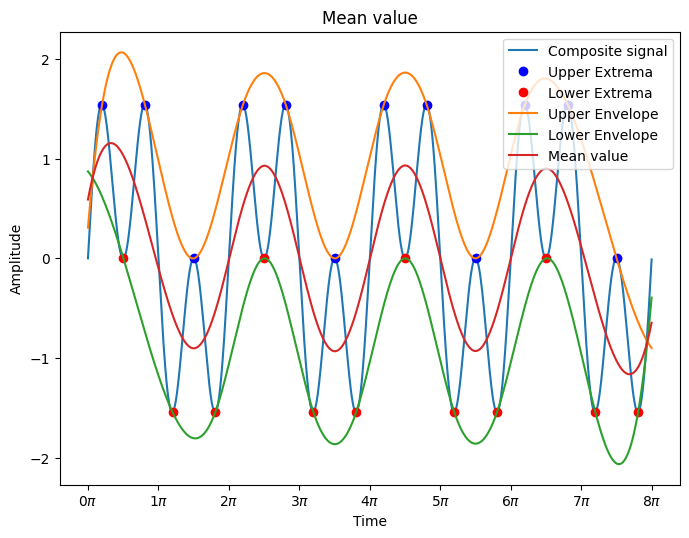

In [6]:
mid_value = np.zeros(len(lower_env))
for i in range(len(mid_value)):
    mid_value[i] = (upper_env[i] + lower_env[i]) / 2

plt.plot(time, amplitude_composite, label = "Composite signal")
plt.plot(time, upper, "bo", label = "Upper Extrema")
plt.plot(time, lower, "ro", label = "Lower Extrema")
plt.plot(time, upper_env, label = "Upper Envelope")
plt.plot(time, lower_env, label = "Lower Envelope")
plt.plot(time, mid_value, label = "Mean value")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xticks(x_ticks * np.pi, x_tick_labels)
plt.title("Mean value")
plt.legend(loc = 0)
plt.show()
plt.close()

## Extract IMF

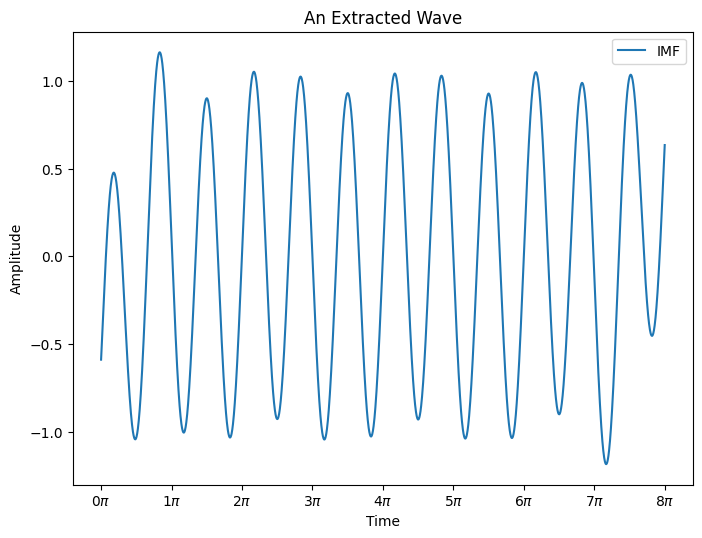

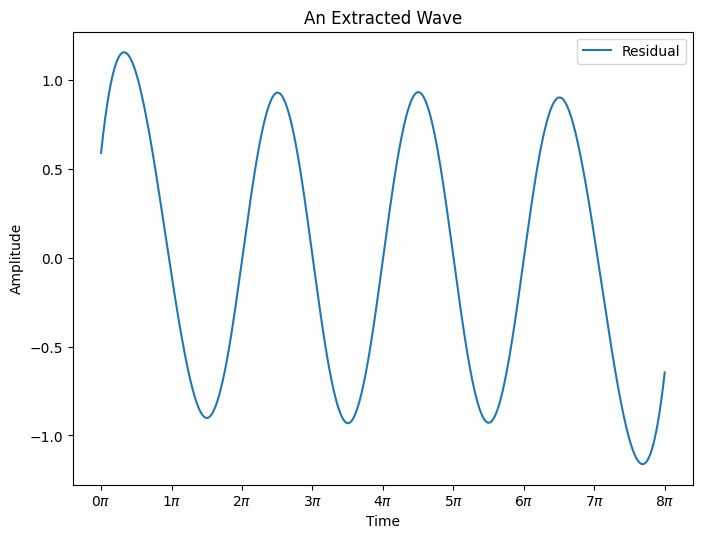

In [7]:
extracted_val = amplitude_composite - mid_value

plt.plot(time, extracted_val, label = "IMF")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xticks(x_ticks * np.pi, x_tick_labels)
plt.title('An Extracted Wave')
plt.legend(loc = 0)
plt.show()
plt.close()
plt.plot(time, amplitude_composite - extracted_val, label = "Residual")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xticks(x_ticks * np.pi, x_tick_labels)
plt.title('An Extracted Wave')
plt.legend(loc = 0)
plt.show()
plt.close()

# Full code

In [8]:
def function(amplitude_composite, time):
    nodata_flag = np.nan
    upper = np.zeros(len(amplitude_composite))
    lower = np.zeros(len(amplitude_composite))
    upper[:] = nodata_flag
    lower[:] = nodata_flag

    graph_stat_history = 'up'
    graph_stat_recent = 'up'
    for i in range(len(amplitude_composite)):
        if i == 1:
            if amplitude_composite[i] > amplitude_composite[i-1]:
                graph_stat_recent = 'up'
                graph_stat_history = 'up'
            elif amplitude_composite[i] < amplitude_composite[i-1]:
                graph_stat_recent = 'down'
                graph_stat_history = 'down'
            else:
                graph_stat_recent = graph_stat_history
                continue
        if amplitude_composite[i] > amplitude_composite[i-1]:
            graph_stat_recent = 'up'
        elif amplitude_composite[i] < amplitude_composite[i-1]:
            graph_stat_recent = 'down'
        else:
            graph_stat_recent = graph_stat_history
        
        if graph_stat_recent != graph_stat_history:
            if graph_stat_recent == 'up':
                lower[i] = amplitude_composite[i-1]
                graph_stat_history = 'up'
            elif graph_stat_recent == 'down':
                upper[i] = amplitude_composite[i-1]
                graph_stat_history = 'down'
    
    all_minima_point = []
    all_minima_point_time = []
    all_maxima_point = []
    all_maxima_point_time = []
    for i in range(len(lower)):
        if not np.isnan(lower[i]):
            all_minima_point.append(lower[i])
            all_minima_point_time.append(time[i])

    for i in range(len(upper)):
        if not np.isnan(upper[i]):
            all_maxima_point.append(upper[i])
            all_maxima_point_time.append(time[i])

    all_minima_point = np.asarray(all_minima_point)
    all_minima_point_time = np.asarray(all_minima_point_time)
    all_maxima_point = np.asarray(all_maxima_point)
    all_maxima_point_time = np.asarray(all_maxima_point_time)

    #print(all_maxima_point, all_minima_point)
    cs_minima = CubicSpline(all_minima_point_time, all_minima_point)
    cs_maxima = CubicSpline(all_maxima_point_time, all_maxima_point)
    #print(cs_minima, cs_maxima)
    lower_env = cs_minima(time)
    upper_env = cs_maxima(time)
    #print(lower_env)

    mid_value = np.zeros(len(lower_env))
    for i in range(len(mid_value)):
        mid_value[i] = (upper_env[i] + lower_env[i]) / 2

    extracted_val = amplitude_composite - mid_value

    return extracted_val

# Example EMD Process

## Sample Signal

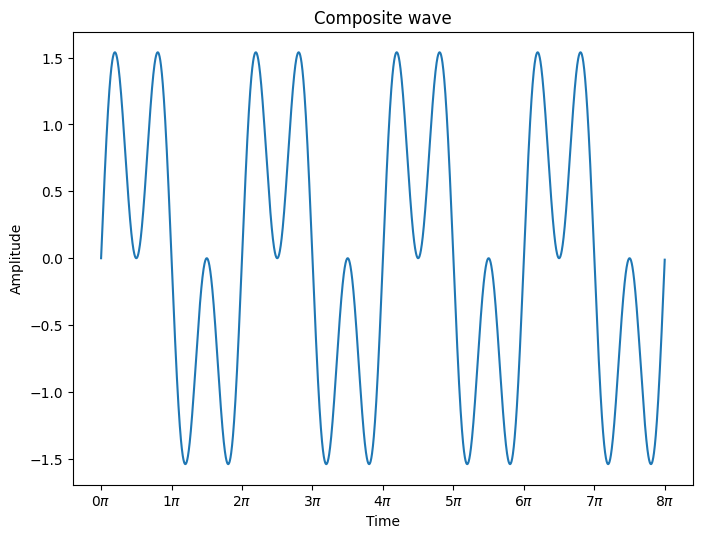

In [9]:
frequency_1 = 1
frequency_2 = 3

resolution = 0.01
cycles = 4
time = np.arange(0, 2 * cycles * np.pi, resolution)

amplitude_1 = np.sin(frequency_1 * time)
amplitude_2 = np.sin(frequency_2 * time)
amplitude_composite = amplitude_1 + amplitude_2

x_ticks = np.arange(0, 2 * cycles)
x_ticks = np.append(x_ticks, 2 * cycles)
x_tick_labels = [f"{Fraction(x)}$\pi$" for x in x_ticks]

plt.plot(time, amplitude_composite)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xticks(x_ticks * np.pi, x_tick_labels)
plt.title("Composite wave")
plt.show()
plt.close()

## IMF 1

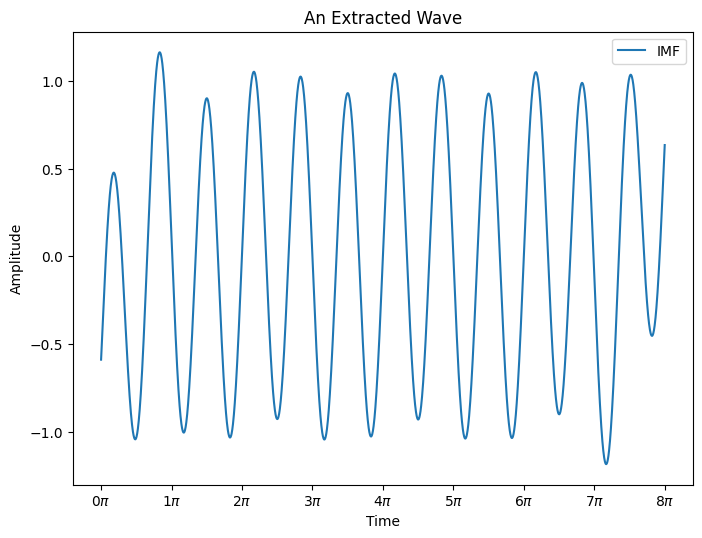

In [10]:
extracted_val = function(amplitude_composite, time)
amplitude_composite -= extracted_val

plt.plot(time, extracted_val, label = "IMF")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xticks(x_ticks * np.pi, x_tick_labels)
plt.title('An Extracted Wave')
plt.legend(loc = 0)
plt.show()
plt.close()

## IMF 2

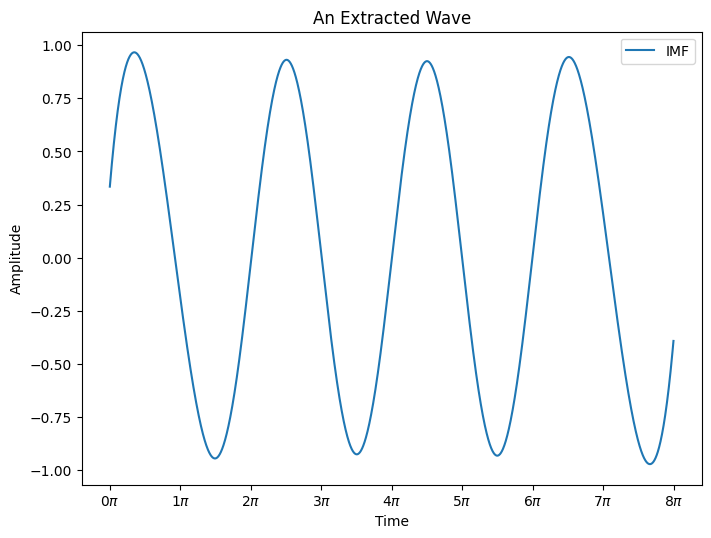

In [11]:
extracted_val = function(amplitude_composite, time)
amplitude_composite -= extracted_val

plt.plot(time, extracted_val, label = "IMF")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xticks(x_ticks * np.pi, x_tick_labels)
plt.title('An Extracted Wave')
plt.legend(loc = 0)
plt.show()
plt.close()

## Residual

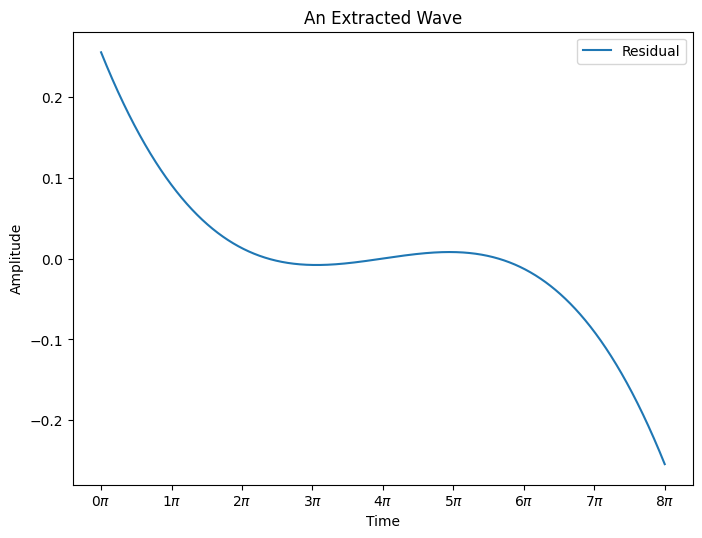

In [12]:
plt.plot(time, amplitude_composite, label = "Residual")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xticks(x_ticks * np.pi, x_tick_labels)
plt.title('An Extracted Wave')
plt.legend(loc = 0)
plt.show()
plt.close()